In [1]:
#hide
#conda install -c conda-forge ipywidgets
#pip3 install fastai
#pip3 install azure-cognitiveservices-search-imagesearch
#pip3 install azure-cognitiveservices-search-websearch
#pip3 install nbdev
#pip3 install graphviz
from utils import *

In [2]:
import fastai
fastai.__version__

'2.7.10'

In [3]:
torch.cuda.is_available()

True

# Your deep learning journey

## Deep learning is for everyone

## Neural networks: a brief history

## What you will learn

## Who we are

## How to learn deep learning

## Your projects and your mindset

## The software: PyTorch, fastai, and Jupyter (and why it doesn't matter)

## Your first model

### Getting a GPU deep learning server

### Running your first notebook

In [5]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/data/cqs/softwares/conda_py3_10/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/data/cqs/softwares/conda_py3_10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/cqs/softwares/conda_py3_10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b62

epoch,train_loss,valid_loss,error_rate,time
0,0.173703,0.023415,0.009472,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.051613,0.023356,0.010149,01:43


### Sidebar: This book was written in Jupyter Notebooks

In [ ]:
1+1

2

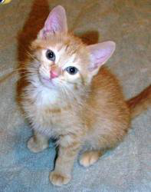

In [ ]:
img = PILImage.create('images/chapter1_cat_example.jpg')
img.to_thumb(192)

### End sidebar

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}; Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True; Probability it's a cat: 0.999060


### What is machine learning?

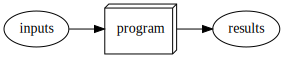

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

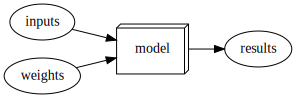

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

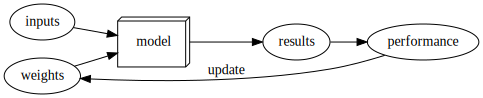

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

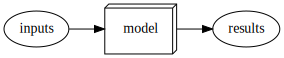

In [ ]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What is a neural network?

### A bit of deep learning jargon

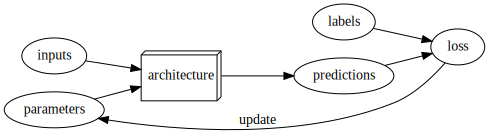

In [ ]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### What our image recognizer did

### What our image recognizer learned

### What image recognizers can do

### A bit more jargon

## Deep learning is not just for image classification

In [4]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/home/shengq2/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shengq2/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,2.879038,2.509947,00:02


epoch,train_loss,valid_loss,time
0,1.998627,1.685165,00:01
1,1.738976,1.589139,00:01
2,1.564422,1.122028,00:01
3,1.394923,0.973677,00:01
4,1.266070,0.827794,00:01
5,1.141516,0.768973,00:01
6,1.038788,0.737652,00:01
7,0.960371,0.729885,00:01


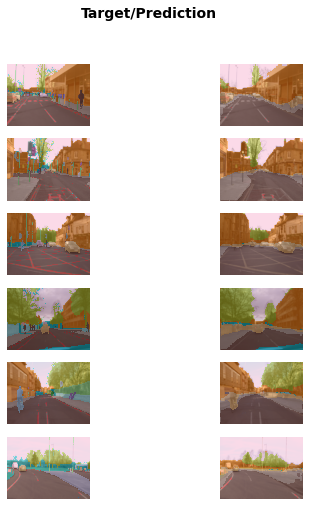

In [5]:
learn.show_results(max_n=6, figsize=(7,8))

In [6]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.462906,0.392480,0.824400,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.305105,0.241835,0.901040,00:48
1,0.241942,0.210687,0.920640,00:48
2,0.190552,0.177840,0.931720,00:48
3,0.147956,0.193363,0.930040,00:48


In [12]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([1.5131e-04, 9.9985e-01]))

### Sidebar: The order matter

### End sidebar

In [17]:
from IPython.display import display, HTML, Markdown

In [38]:
md = show_doc(learn.predict, renderer=BasicHtmlRenderer) 



In [39]:

md = show_doc(learn.predict, display=False)
md += f'\n\n<a href="https://dev.fast.ai/learner#Learner.predict" target="_blank" rel="noreferrer noopener">Show in docs</a>'
display(Markdown(md))

TypeError: show_doc() got an unexpected keyword argument 'display'

In [40]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [42]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.367372,0.344454,0.846437,00:04
1,0.349539,0.345213,0.844748,00:04
2,0.346467,0.339983,0.844748,00:05


In [43]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.517242,1.384004,00:00


epoch,train_loss,valid_loss,time
0,1.374231,1.323961,00:00
1,1.262300,1.144429,00:00
2,1.038423,0.833691,00:00
3,0.818118,0.680152,00:00
4,0.705914,0.636358,00:00
5,0.658518,0.623444,00:00
6,0.637949,0.615830,00:00
7,0.629874,0.612183,00:00
8,0.613648,0.611126,00:00
9,0.622629,0.610929,00:00


In [44]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,49.0,6.0,5.0,4.363873
1,59.0,74.0,4.5,3.787565
2,33.0,52.0,4.0,3.852740
3,30.0,1.0,3.0,4.020113
4,41.0,11.0,4.0,3.655044
5,73.0,76.0,5.0,3.815626
6,78.0,16.0,4.0,4.559519
7,73.0,68.0,2.0,3.404654
8,35.0,38.0,5.0,3.048932


### Sidebar: Datasets: food for models

### End sidebar

## Validation sets and test sets

### Use judgment in defining test sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

### Further research